## Project Objectives
1.  Realise and Visualise top-Grossig Concerts
2.  Investigate the Variables  strongly contributing to Concert Profitability
3.  Cite Recommendations
4.   State Limitations of the Survey  

###  Important Steps
1. Import Important Libraries
2. Define Connection Parameters(To the Database)
3. Define Connection String
4. Establish Connection
5. Close Connection
6. Make Visualization(Top 5 Grossing Concerts by Revenue)
7. Save Figure(Visualization)

## 1. Realise and Visualize Top-Grossing Concerts

###  Import  Libraries

In [4]:
import pandas as pd
import seaborn as sns
import pyodbc 
import matplotlib.pyplot as plt
import os

### Connection to the Database 

In [5]:
server = 'DESKTOP-U507UFU'
database = 'PRACTICE'
conn_str = (
    "Driver= {SQL Server};"
    f"Server={server};"
    f"Database={database};"
    "Trusted_Connection=yes;"    
)
conn = pyodbc.connect(conn_str)

In [3]:
query = """
             SELECT 
        concert_id,
        tickets_sold,
        city,
        sponsor,
        label,
        	artist_name,
            ticket_price_avg,
        	genre,
        	concert_revenue,
            profit
        FROM concerts AS c1 
        WHERE concert_revenue =(
        	SELECT MAX (concert_revenue)
        	FROM concerts AS c2
             WHERE c1.genre = c2.genre
       
        )
         ORDER BY concert_revenue DESC        
        ;
"""

In [4]:
df = pd.read_sql(query, conn)

C:\Users\User\AppData\Local\Temp\ipykernel_7036\1168034203.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


## Data Inpsection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   concert_id        5 non-null      int64  
 1   tickets_sold      5 non-null      object 
 2   city              5 non-null      object 
 3   sponsor           5 non-null      object 
 4   label             5 non-null      object 
 5   artist_name       5 non-null      object 
 6   ticket_price_avg  5 non-null      object 
 7   genre             5 non-null      object 
 8   concert_revenue   5 non-null      float64
 9   profit            5 non-null      object 
dtypes: float64(1), int64(1), object(8)
memory usage: 532.0+ bytes


In [6]:
df.describe()


,concert_id,concert_revenue
count,5.000000,5.000000
mean,36.000000,792936.806000
std,18.425526,133540.920734
min,10.000000,638938.120000
25%,30.000000,654919.010000
50%,33.000000,881544.540000
75%,50.000000,890812.810000
max,57.000000,898469.550000


In [7]:
df.shape

(5, 10)

In [8]:
df.head(20)

,concert_id,tickets_sold,city,sponsor,label,artist_name,ticket_price_avg,genre,concert_revenue,profit
0,57,44045,London,Pepsi,Big Hit Music,BTS,76.44,K-Pop,898469.55,1027459.95
1,50,49895,Tokyo,Nike,XO Records,The Weeknd,197.11,R&B/Pop,890812.81,929261.36
2,30,46583,Los Angeles,Coca-Cola,Republic Records,Ariana Grande,185.78,Pop,881544.54,740348.36
3,33,62482,London,Apple,Aftermath Entertainment,Eminem,134.49,Hip-Hop,654919.01,680193.93
4,10,72815,New York,Pepsi,Columbia Records,Beyonce,240.48,R&B,638938.12,541806.42


### Top 5 Perfoming Concerts by Concert Revenue (Visual)

In [8]:
Top5 = df.head(10).copy()

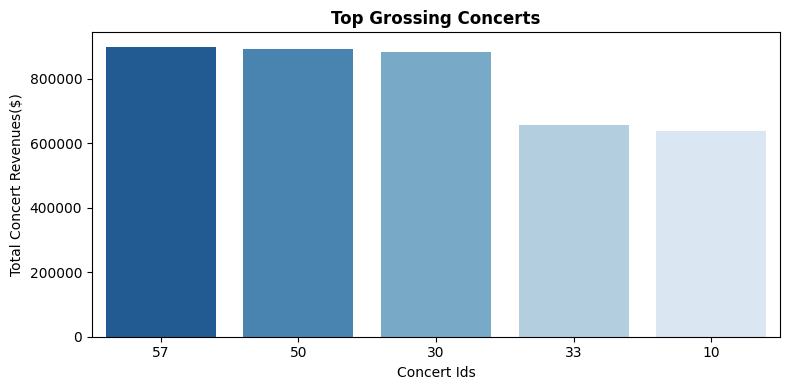

In [9]:
Top5['concert_id'] = Top5['concert_id'].astype(str)
plt.figure(figsize = (8,4))
colors = sns.color_palette("Blues", len(Top5))
sns.barplot(
    data = Top5,
    x = 'concert_id',
    palette =colors[::-1],
    y= 'concert_revenue',
    hue = 'concert_id',
)
plt.title('Top Grossing Concerts', fontweight= 'bold')
plt.xlabel('Concert Ids')
plt.ylabel('Total Concert Revenues($)')
plt.savefig("Top-Grossing Concerts.png", bbox_inches = 'tight', dpi = 300)
plt.tight_layout()
plt.show()

In [82]:
#Extract Out the Filtered  CSV for Power Bi Visualization and KPIs 
Top5.to_csv("Top5_concerts.csv", index =False)

In [11]:
#Location of the Visualization
print(os.getcwd())

D:\SQL  PRACTICE\music_concert\High Grossing Concerts


## Correlation/Relationship between Concert Variables
**Goal/Objective:** Track Variables that drive Concert Profitability/Success

In [6]:
#Fetch Concert Data from SQL server database 
query1 = """
SELECT * FROM concerts
"""
df2 = pd.read_sql(query1, conn)

C:\Users\User\AppData\Local\Temp\ipykernel_12680\1273826675.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query1, conn)


In [7]:
#Close database Connection
conn.close()

In [8]:
#Data Inspection(Quick Data Inspection about datatypes and rows)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   concert_id              70 non-null     int64  
 1   artist_id               70 non-null     object 
 2   artist_name             70 non-null     object 
 3   genre                   70 non-null     object 
 4   concert_revenue         70 non-null     float64
 5   venue_capacity          70 non-null     object 
 6   tickets_sold            70 non-null     object 
 7   ticket_price_avg        70 non-null     object 
 8   concert_date            70 non-null     object 
 9   country                 70 non-null     object 
 10  city                    70 non-null     object 
 11  sponsor                 70 non-null     object 
 12  label                   70 non-null     object 
 13  album_released          70 non-null     object 
 14  year_of_formation       70 non-null     obje

In [37]:
#Create a Deep Copy of the Data Frame 
df2 = df2.copy()

In [8]:
#Stripping White Spaces from Columns incase any
df2.columns = df2.columns.str.strip()

In [9]:
#Convert Column datatypes to Numeric Using a for Loop
cols_to_convert = [
    'concert_id',
    'artist_id',
    'concert_revenue',
'venue_capacity', 'tickets_sold', 'ticket_price_avg', 'year_of_formation',
    'number_of_members', 'duration_minutes', 'stage_setup_cost', 'marketing_cost',
    'security_cost', 'lighting_cost', 'sound_engineering_cost', 'merchandise_revenue',
    'streaming_revenue', 'food_beverage_revenue', 'total_expense', 'profit'
]
for col in cols_to_convert:
    df2[col]  = pd.to_numeric(df2[col], errors = 'coerce')

    


### Plotting a correlation heatmap for Concert Metrics

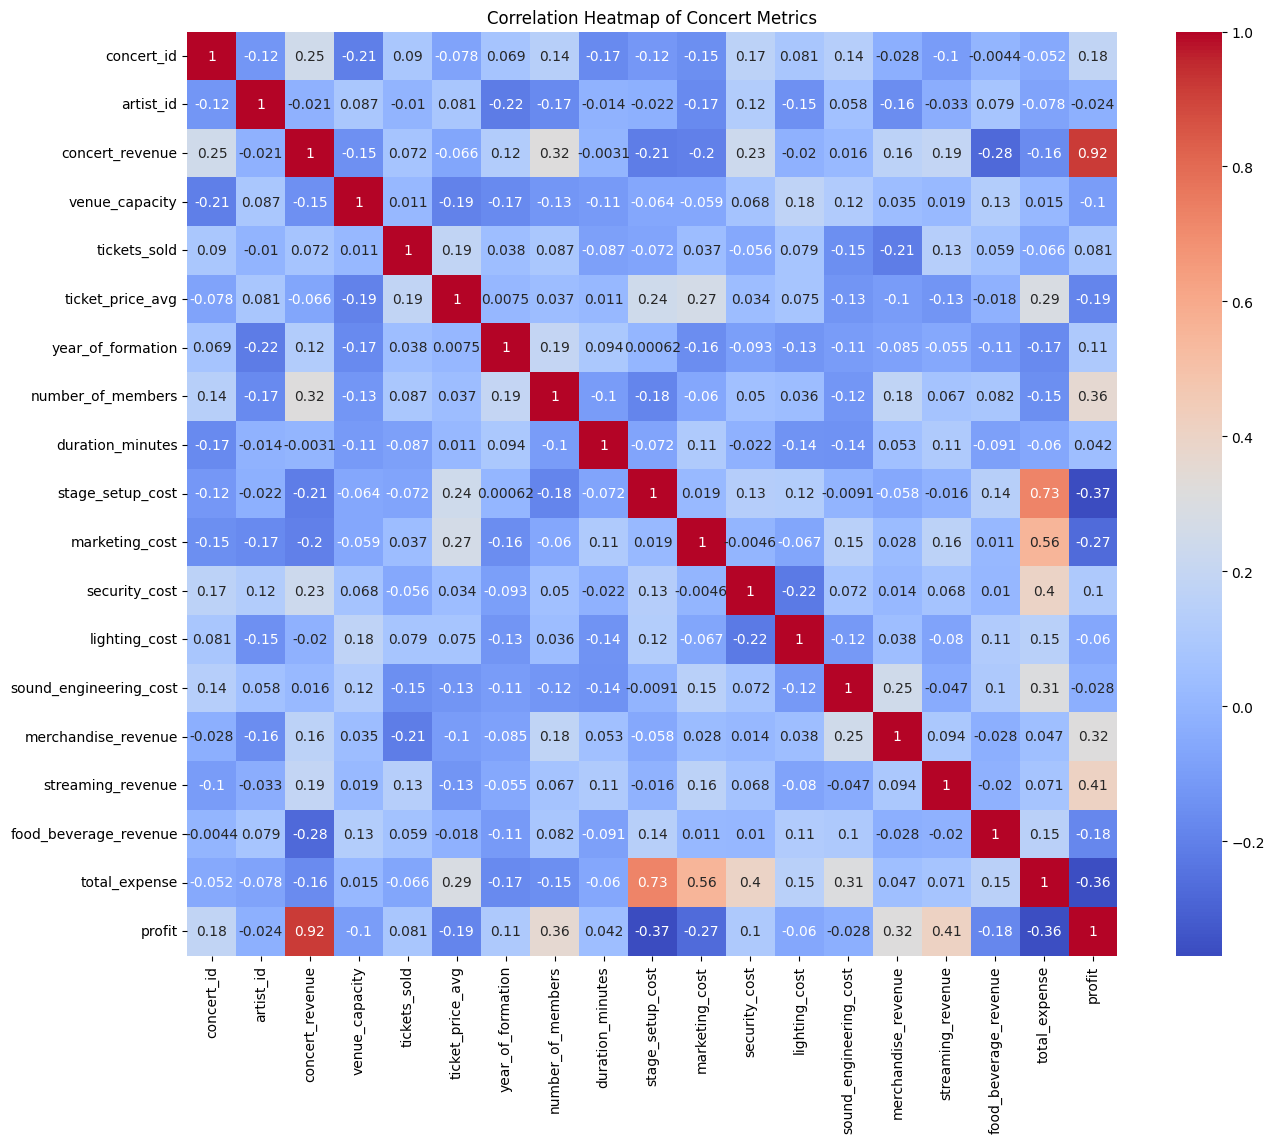

In [14]:
plt.figure(figsize=(15,12))
sns.heatmap(df2[cols_to_convert].corr(), annot= True, cmap = 'coolwarm')
plt.title("Correlation Heatmap of Concert Metrics")
plt.savefig("Correlation Heatmap of Concert metrics.png", dpi=300, bbox_inches= 'tight')
plt.show()

In [15]:
#Locate Correlation Location
import os
print(os.getcwd())

D:\SQL  PRACTICE\music_concert\High Grossing Concerts


## 2. Findings(Major Contributors to Concert Profitability)

- Major Contributors to Concert Profitability
   - Profit
   - Concert_revenue
   - Total_expense
         
 **1. Profit(target Variable)[Positive Contributors]**
   - **Concert revenue(0.92)**→Very Strong Positive(+) Correlation
     - Largest single Linear contributor to profits in the dataset i.e More revenue , more profit
   - **Streaming Revenue(0.42)**→ Moderate positive Correlation
       - Streaming is an important complementary revenue stream.
   - **Number of Band members(0.36)**→Moderate Positive corr.
      - This might reflect larger acts( More Artists) attracting higher spend, sponsorships, or merchandise sales.
    - **Total expense(-0.36)**→ Moderate negative Corr.
      - Higher total expenses reduce profits.
    - **Merchandise Revenue(0.32)**→Moderate Corr.
      - Reflects impact from generated from selling branded items like t-shirts, posters, vinyl records, and other memorabilia to fans at a live show
    - **Market Cost(-0.25)**→ Negative Corr.
      - Marketing spend correlates with lower profit unless it generates incremental revenue; suggests marketing ROI varies.
    - **Tickets Sold(~+0.08)**→ Shows volume alone isn't the dominant factor without price/other revenue streams.
    - **Ticket price Average(-0.19)**→ Negative corr.
      -  May indicate pricing strategy trade-offs (higher price may reduce volume or be correlated with higher costs).
     
 **2. Concert Revenue (Target Variable 2)**
 - **Profit(0.92)**→ Very high positive corr.
 - **Number of Band members (0.32)**
   - Larger Acts may command higher revenues
  

**3. Total expense(Target Variable 3)**
   - **Stage setup Cost(0.73)**→Very strong positive corr.
       - major driver of total expense.
   - **Marketing Cost(0.56)**→Strong positive Corr.
   - **Security Cost(0.40)**→Moderate positive corr.
   - **Sound Enngineering Cost(0.31)**→Moderate Corr.
     - These show that a few concentrated cost make up most of expensive variation.
    


## 3. Recommendations
**Actionable Recommendations**
- Revenue-side strategies 

**1. Grow concert revenue(primary lever)**
  -  Improve ticket sales via targeted promotions to high-Value segments
  -  Use dynamic pricing :Test price points for revenue-maximising rather than just sell-out maximizing
  -  Package offers(VIP + merchadise) that increase per-attendee spend.

**2. Expand and Monetize secondary revenues**
  - Streaming: Record concerts and push streaming packages & exclusive content; tier streaming promotions to ticket buyers.
  - Merchandise: better on-site placement, limited editions, bundlewith VIP experiences, and pre-orders to reduce inventory risk.
  - Food & beverage: implement upsells, cashless payments, and premium offerings to raise per-capita spend.

**3. Improve artist/band value**
 - If “number_of_members” is a proxy for act popularity, invest in acts that reliably increase revenue — but validate with ROI (artist fees vs incremental revenue).

 

**Cost-Side Strategies**

**1. Control major expenses buckets**
   - Stage stageup: renegotiate with vendors, standardize stage packages, reuse sets across dates/tours, adopt modular rigs to reduce custom one-off spends.
     - Marketing: shift to performance marketing with tight attribution (track conversions from campaign → ticket/merch sales). Optimize channels by cost-per-revenue, not just cost-per-click.
     - Security & sound contracts:use preferred-vendor agreements and performance SLAs(Service Level Agreement) to stabilize pricing.

**2. Measure activity ROI**
   -  For every spend (marketing, stage, security), track incremental revenue it produces. If marketing campaigns don’t lift incremental concert revenue, reallocate budget.
  




## 4.  Limitations 
- **Data Quality & Scale:** Correlations can be sensitive to Outliers
- **Collineality:** some cost features are tightly correlated with total_expense (e.g., stage_setup_cost), which can complicate interpretation in simple regressions.
- **Correlation ≠ causation:** The matrix tells which variables move together, not which ones cause profit changes. Implement experiments and causal models are recommended before committing large changes.

    - **NOTE:** Relying purely on correlation risks making changes that either have no effect or an unintended negative one. Causal inference methods are essential for making informed, high-stakes business decisions. 
